In [4]:
from langgraph.graph import StateGraph, START, END
import json
from estado import AgentState
from estado import Nivel
from agentes_de_analisis import nodo_analizar_num_programas_instituciones
from agentes_de_analisis import nodo_analizar_matriculas_vs_estudiantes
from agentes_de_analisis import nodo_analizar_matriculas_vs_tiempo
from agentes_de_analisis import nodo_analizar_programas_por_departamento_municipio
from agentes_de_analisis import nodo_analizar_num_estudiantes_tiempo
from buscador_programas import build_query_agent


In [5]:
from lector import nodo_lector_snies  # importa tu tool
builder = StateGraph(AgentState)
# Añadir el nodo
builder.add_node("lector_snies", nodo_lector_snies)
builder.add_node("analizar_num_programas_instituciones", nodo_analizar_num_programas_instituciones)
builder.add_node("analizar_matriculas_vs_estudiantes", nodo_analizar_matriculas_vs_estudiantes)
builder.add_node("analizar_matriculas_vs_tiempo", nodo_analizar_matriculas_vs_tiempo)
builder.add_node("analizar_programas_por_departamento_municipio", nodo_analizar_programas_por_departamento_municipio)
builder.add_node("analizar_num_estudiantes_tiempo", nodo_analizar_num_estudiantes_tiempo)
builder.add_node("busqueda_web_programas", build_query_agent)

builder.add_edge(START, "lector_snies")
builder.add_edge("lector_snies", "busqueda_web_programas")
#builder.add_edge("lector_snies", "analizar_num_programas_instituciones")
#builder.add_edge("analizar_num_programas_instituciones", "analizar_matriculas_vs_estudiantes")
#builder.add_edge("analizar_matriculas_vs_estudiantes", "analizar_matriculas_vs_tiempo")
#builder.add_edge("analizar_matriculas_vs_tiempo", "analizar_programas_por_departamento_municipio")
#builder.add_edge("analizar_programas_por_departamento_municipio", "analizar_num_estudiantes_tiempo")
#builder.add_edge("analizar_num_estudiantes_tiempo", "busqueda_web_programas")
builder.add_edge("busqueda_web_programas", END)
graph = builder.compile()


Agente: análisis de información existente de SNIES
Revisando si ya hay información:  0
Lector de Snies
Proceso de carga de los archivos de SNIES
Archivos de SNIES cargados correctamente
Programas equivalentes encontrados:  ['ingenieria materiales', 'ingenieria nanotecnologia', 'diseno innovacion materiales']
{'num_programas_instituciones_tiempo': [{'PERIODO': '2000-1', 'SECTOR': 'Oficial', 'NUM_INSTITUCIONES': 2, 'NUM_PROGRAMAS': 2}, {'PERIODO': '2000-1', 'SECTOR': 'Privado', 'NUM_INSTITUCIONES': 5, 'NUM_PROGRAMAS': 5}, {'PERIODO': '2000-2', 'SECTOR': 'Oficial', 'NUM_INSTITUCIONES': 2, 'NUM_PROGRAMAS': 2}, {'PERIODO': '2000-2', 'SECTOR': 'Privado', 'NUM_INSTITUCIONES': 5, 'NUM_PROGRAMAS': 5}, {'PERIODO': '2001-1', 'SECTOR': 'Oficial', 'NUM_INSTITUCIONES': 2, 'NUM_PROGRAMAS': 2}, {'PERIODO': '2001-1', 'SECTOR': 'Privado', 'NUM_INSTITUCIONES': 5, 'NUM_PROGRAMAS': 5}, {'PERIODO': '2001-2', 'SECTOR': 'Oficial', 'NUM_INSTITUCIONES': 2, 'NUM_PROGRAMAS': 2}, {'PERIODO': '2001-2', 'SECTOR': '

c:\Users\000010478\Downloads\agentes_programas\.venv\Lib\site-packages\pydantic\main.py:464: UserWarning: Pydantic serializer warnings:
  PydanticSerializationUnexpectedValue(Expected `none` - serialized value may not be as expected [field_name='parsed', input_value=QueryPlan(queries=['site:...ales malla curricular']), input_type=QueryPlan])
  return self.__pydantic_serializer__.to_python(


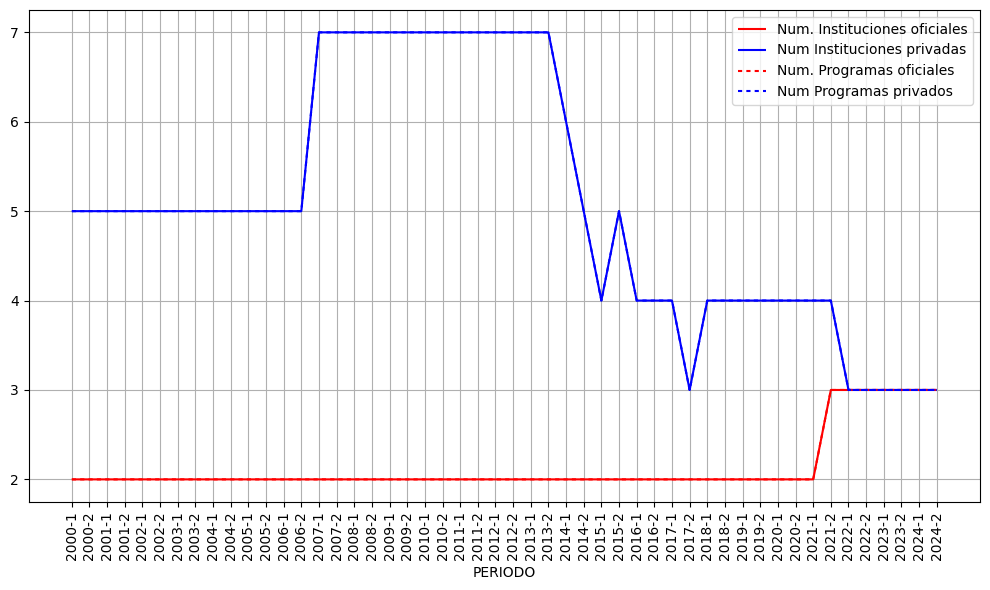

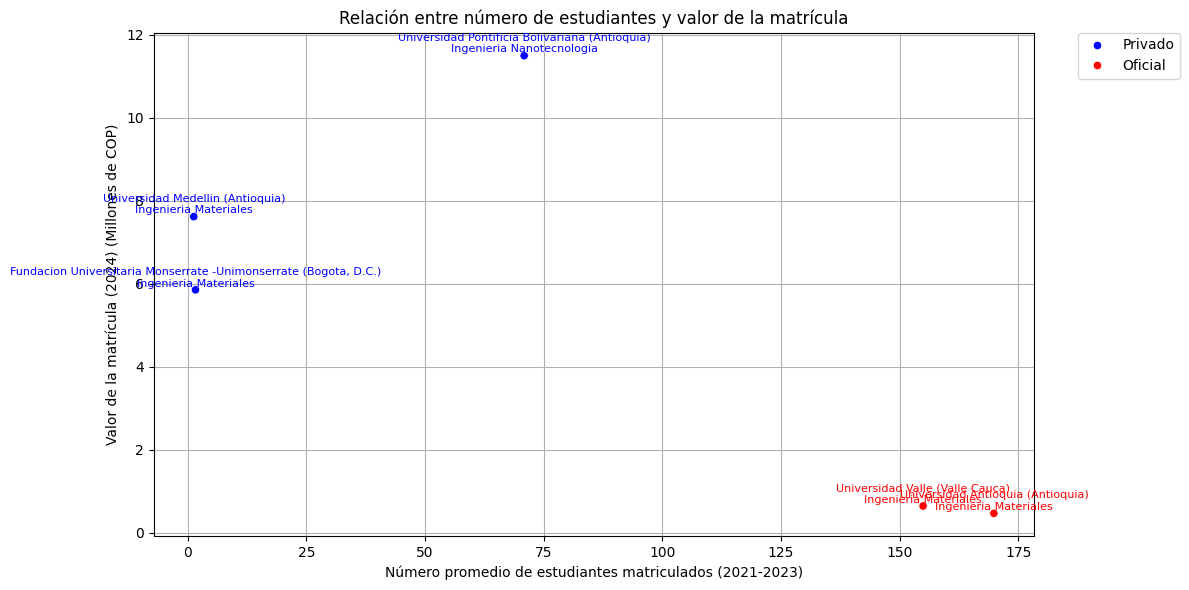

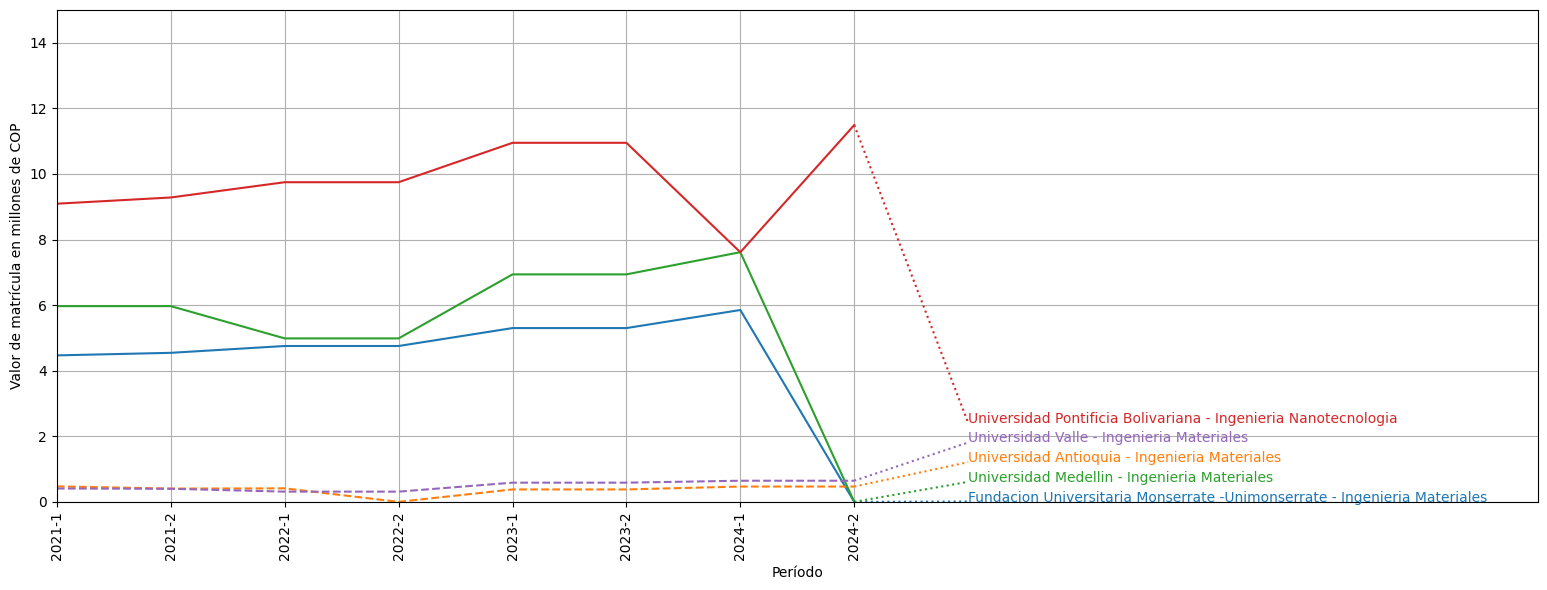

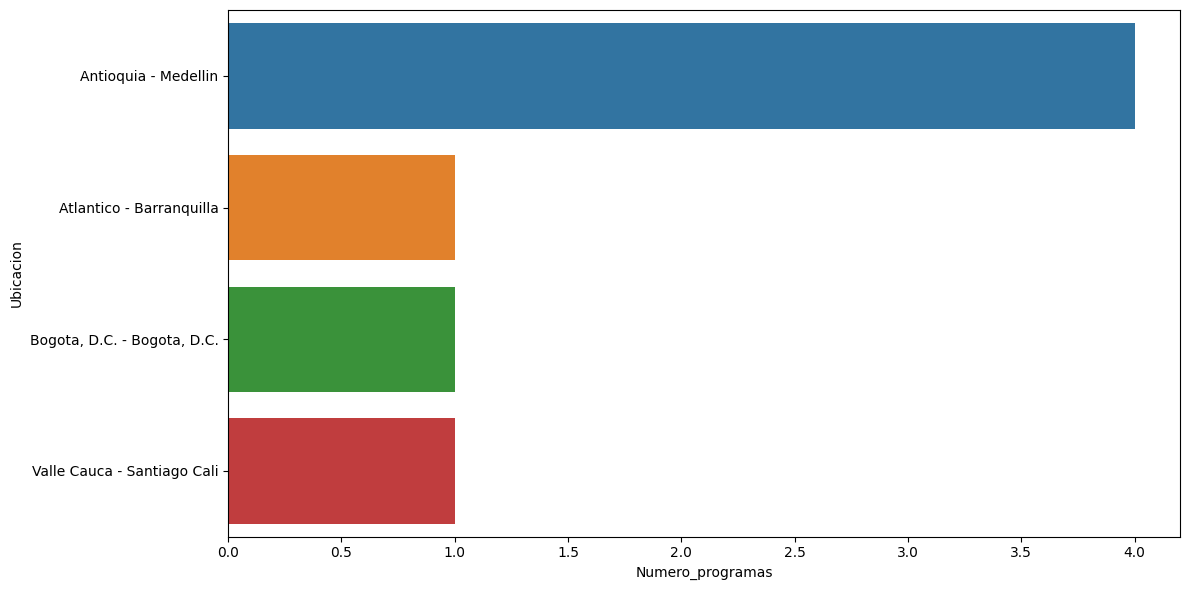

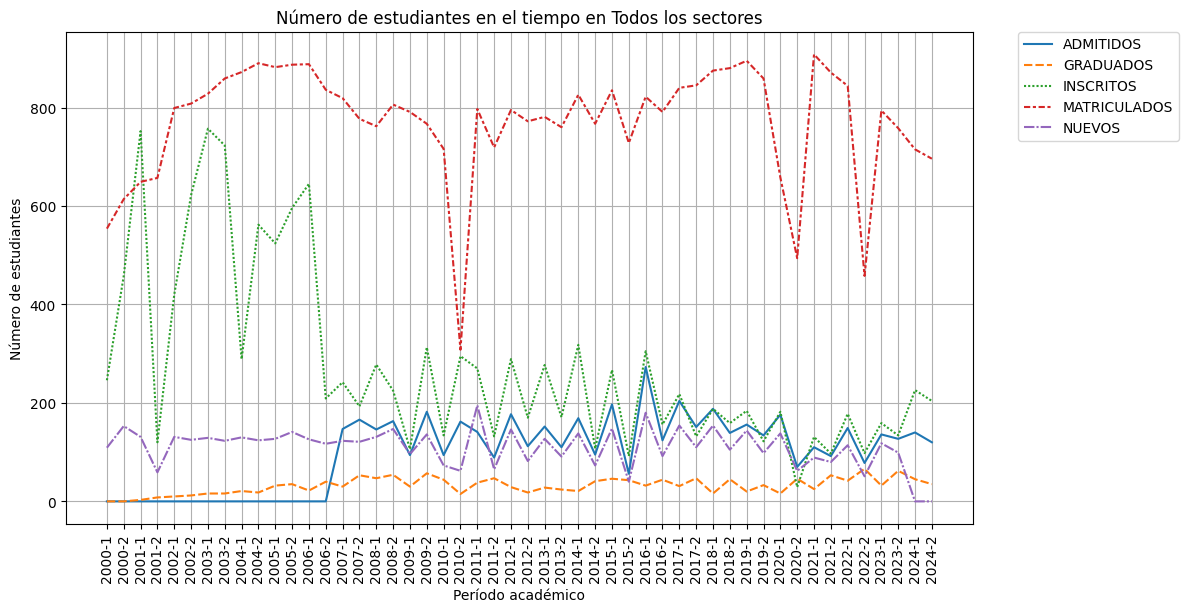

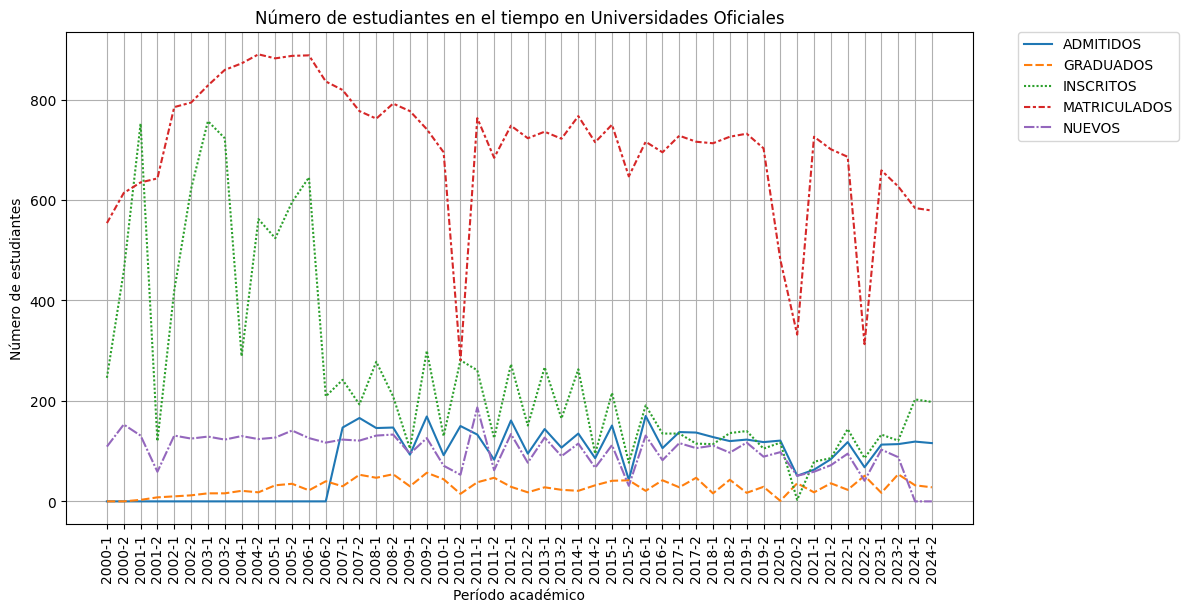

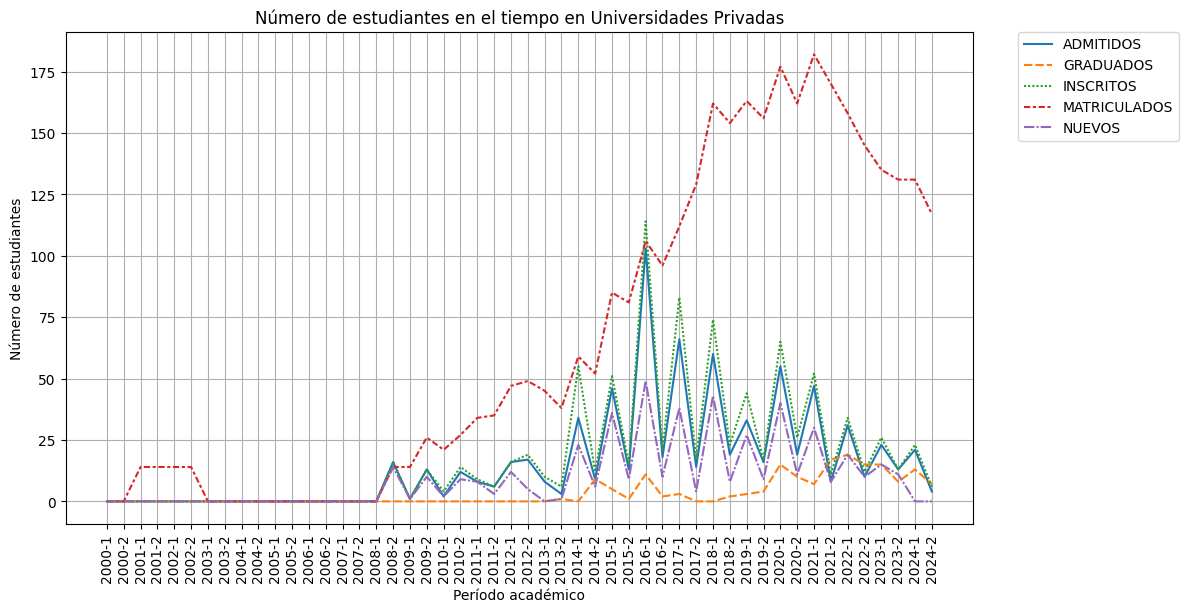

In [6]:
estado_inicial = AgentState(
    nombre="Ingeniería Materiales Nanotecnología",
    nivel=Nivel.especializacion,
    descripcion="Programa de ingeniería enfocado en materiales a escala nanométrica.",
    requerido=["nano","material"],
    informacion_programas_nacionales=[],
    target_index=0
)
import os
if os.path.exists("./salida/final_state.json"):
    #Existe un estado previo, se debe verificar que corresponde al actual
    with open("./salida/final_state.json", "r") as f:
        final_state_json = f.read()
        final_state = AgentState.model_validate_json(final_state_json)
        if final_state.nombre == estado_inicial.nombre and final_state.nivel == estado_inicial.nivel and final_state.requerido == estado_inicial.requerido:
            print("El estado previo corresponde al estado inicial actual, se reutiliza la información.")
            estado_inicial = final_state
        else:
            print("El estado previo no corresponde al estado inicial actual, se ejecuta el grafo para obtener un nuevo estado.")
        
final_state = graph.invoke(estado_inicial)
final_state = AgentState.model_validate(final_state)

with open("salida/final_state.json", "w", encoding="utf-8") as f:
    f.write(final_state.model_dump_json(indent=4, ensure_ascii=False))